In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set(color_codes=True)
import networkx as nx
from numpy import nan
import math

In [2]:
df_centrality = pd.read_pickle('net_centrality.pkl')
df_features = pd.read_pickle('net_features_direct.pkl')
df_features = pd.concat([df_centrality, df_features],axis =1)

In [3]:
df2016 = pd.read_pickle('df2016.pkl')
df2015 = pd.read_pickle('df2015.pkl')

In [4]:
G2016 = nx.from_pandas_edgelist(df2016,'source_ticker', 'target_ticker', create_using = nx.DiGraph())
G2015 = nx.from_pandas_edgelist(df2015,'source_ticker', 'target_ticker', create_using = nx.DiGraph())

In [5]:
indegree2016 = pd.Series(G2016.in_degree())
indegree2016 = pd.DataFrame(indegree2016, columns=['firms'])
indegree2016[['firms','in_degree2016']] = indegree2016['firms'].apply(pd.Series)
indegree2016.set_index('firms', inplace=True)

In [6]:
outdegree2016 = pd.Series(G2016.out_degree())
outdegree2016 = pd.DataFrame(outdegree2016, columns=['firms'])
outdegree2016[['firms','out_degree2016']] = outdegree2016['firms'].apply(pd.Series)
outdegree2016.set_index('firms', inplace=True)

In [7]:
indegree2015 = pd.Series(G2015.in_degree())
indegree2015 = pd.DataFrame(indegree2015, columns=['firms'])
indegree2015[['firms','in_degree2015']] = indegree2015['firms'].apply(pd.Series)
indegree2015.set_index('firms', inplace=True)

In [8]:
outdegree2015 = pd.Series(G2015.out_degree())
outdegree2015 = pd.DataFrame(outdegree2015, columns=['firms'])
outdegree2015[['firms','out_degree2015']] = outdegree2015['firms'].apply(pd.Series)
outdegree2015.set_index('firms', inplace=True)

In [9]:
df_ml = pd.concat([df_features, outdegree2015, indegree2015, 
                   outdegree2016, indegree2016],axis =1)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [10]:
df_ml = df_ml.dropna()

In [11]:
# from sklearn import preprocessing
# from sklearn.preprocessing import OneHotEncoder
# enc = preprocessing.OneHotEncoder()
# groups = df_ml['groups'].as_matrix()
# onehotlabels = enc.fit_transform(groups.reshape(-1,1)).toarray()
# onehotlabels.shape

In [12]:
# onehotlabels = pd.DataFrame(onehotlabels, columns = ['group1','group2','group3','group4','group5',
#                                                      'group6','group7','group8','group9'],index = df_ml.index)

In [13]:
df_ml['diff_indegree'] = df_ml['in_degree2016'] - df_ml['in_degree2015']
df_ml['diff_outdegree'] = df_ml['out_degree2016'] - df_ml['out_degree2015']

In [14]:
df_1 = df_ml.loc[df_ml['diff_outdegree'] < 0]
df_1['group'] = -1

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df_2 = df_ml.loc[df_ml['diff_outdegree'] == 0]
df_2['group'] = 0

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_3 = df_ml.loc[df_ml['diff_outdegree'] > 0]
df_3['group'] = 1

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_ml = pd.concat([df_1,df_2,df_3])

In [18]:
df_ml.to_pickle('df_ml_groups.pkl')

In [19]:
df_ml.head().T

,000032-CN,000050-CN,000061-CN,000099-CN,000230-KR
out_degree_centrality,0.000180,0.000421,1.202429e-04,0.000361,1.202429e-04
in_degree_centrality,0.000060,0.000301,0.000000e+00,0.000120,1.082186e-03
closeness_centrality,0.115853,0.077414,0.000000e+00,0.123850,1.307710e-01
betweenness_centrality,0.000055,0.000136,0.000000e+00,0.000054,1.056210e-04
eigenvector_centrality,0.002149,0.000002,1.246922e-24,0.003213,7.140287e-03
harmonic_centrality,2051.104942,1323.685140,0.000000e+00,2202.317965,2.354349e+03
average_neighbor_degree,96.333333,82.285714,5.000000e+00,16.000000,5.000000e-01
square_clustering,0.000846,0.001488,0.000000e+00,0.003139,0.000000e+00
core_number,4.000000,10.000000,2.000000e+00,8.000000,8.000000e+00
pagerank,0.000031,0.000080,1.931489e-05,0.000035,3.295521e-04


In [20]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15217 entries, 000032-CN to ZYT-GB
Data columns (total 19 columns):
out_degree_centrality      15217 non-null float64
in_degree_centrality       15217 non-null float64
closeness_centrality       15217 non-null float64
betweenness_centrality     15217 non-null float64
eigenvector_centrality     15217 non-null float64
harmonic_centrality        15217 non-null float64
average_neighbor_degree    15217 non-null float64
square_clustering          15217 non-null float64
core_number                15217 non-null float64
pagerank                   15217 non-null float64
hubs                       15217 non-null float64
authorities                15217 non-null float64
out_degree2015             15217 non-null float64
in_degree2015              15217 non-null float64
out_degree2016             15217 non-null float64
in_degree2016              15217 non-null float64
diff_indegree              15217 non-null float64
diff_outdegree             15217 non-

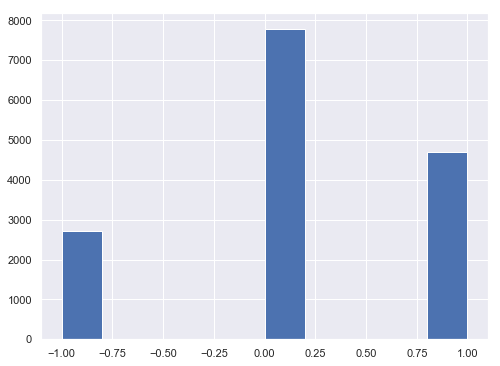

In [23]:
df_ml['group'].hist()
pylab.rcParams['figure.figsize'] = (8, 6)
pylab.savefig('Short and Long.png', dpi=400, bbox_inches = 'tight')